## Análise de Microdados ENEM

In [1]:
import pandas as pd
import matplotlib

In [2]:
colunas = ['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE','IN_GESTANTE', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'Q001', 'Q002']

In [3]:
dadoenem_df = pd.read_csv('brutos/microdados_enem2018/DADOS/MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso-8859-1', usecols=colunas)

In [4]:
dadoenem_df.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,IN_GESTANTE,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,Brasília,53,DF,44.0,M,1,0,0,NaN,NaN,A,A
1,180007197856,São João dos Patos,21,MA,23.0,F,3,1,0,480.3,280.0,B,B
2,180008517434,Mogi das Cruzes,35,SP,23.0,F,1,1,0,NaN,NaN,E,E
3,180007661228,Itapetinga,29,BA,26.0,F,3,2,0,NaN,NaN,B,C
4,180008787987,Jeremoabo,29,BA,20.0,M,0,1,0,NaN,360.0,C,E


In [5]:
dadoenem_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NO_MUNICIPIO_RESIDENCIA  object 
 2   CO_UF_RESIDENCIA         int64  
 3   SG_UF_RESIDENCIA         object 
 4   NU_IDADE                 float64
 5   TP_SEXO                  object 
 6   TP_COR_RACA              int64  
 7   TP_NACIONALIDADE         int64  
 8   IN_GESTANTE              int64  
 9   NU_NOTA_MT               float64
 10  NU_NOTA_REDACAO          float64
 11  Q001                     object 
 12  Q002                     object 
dtypes: float64(3), int64(5), object(5)
memory usage: 1.9 GB


In [6]:
dadoenem_df.columns.values

array(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA',
       'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'IN_GESTANTE', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
       'Q001', 'Q002'], dtype=object)

In [7]:
enem_df = dadoenem_df

In [8]:
coluna_uf = enem_df['SG_UF_RESIDENCIA']

In [9]:
coluna_uf.value_counts()

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

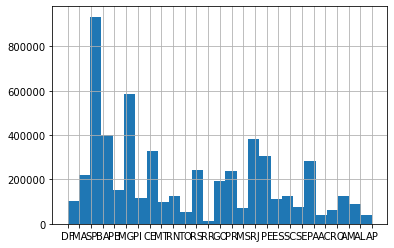

In [10]:
coluna_uf.hist(bins=27)

In [11]:
coluna_gestantes = enem_df['IN_GESTANTE']

In [12]:
distGestante = coluna_gestantes.value_counts()

In [13]:
distGestante

0    5511967
1       1780
Name: IN_GESTANTE, dtype: int64

In [14]:
##Pegar o numero distgestante dividir pelo total e multiplicar por 100 para ter a % para cada um dos elementos distgestante - 2 elementos
percentualGestante = [100*x/distGestante.sum() for x in distGestante] 

In [15]:
percentualGestante

[99.967717053394, 0.032282946606001325]

In [16]:
coluna_tpsexo = enem_df['TP_SEXO']

In [17]:
distTpsexo = coluna_tpsexo.value_counts()

In [18]:
distTpsexo

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [19]:
percentTpSexo = [100*x/distTpsexo.sum() for x in distTpsexo]

In [20]:
##Percentual dentro do universo de quem se declara do sexo feminino

In [21]:
sexoFem = distTpsexo[0]

num_gestantes = distGestante[1]

percentGestantes = 100*num_gestantes/sexoFem

percentGestantes

0.054639726211996614

In [22]:
percentNgestantes = 100 - percentGestantes

percentNgestantes

99.945360273788

In [23]:
#Analises com GroupBy
colunasSelecionada = ['TP_SEXO', 'NU_NOTA_REDACAO']
enem_redacao = dadoenem_df.filter(items=colunasSelecionada)

In [24]:
enem_redacao.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,F,280.0
2,F,NaN
3,F,NaN
4,M,360.0


In [25]:
enem_redacao = enem_redacao.dropna()

In [26]:
enem_redacao.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2454691
M,1693573


In [27]:
enem_redacao.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [28]:
enem_redacao.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


In [29]:
enem_redacao[enem_redacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [30]:
enem_redacao.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,512.529145
M,503.102340


In [31]:
enem_redacao.groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,520.0
M,520.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

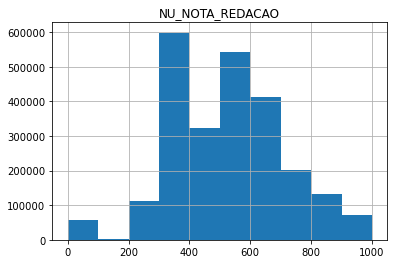

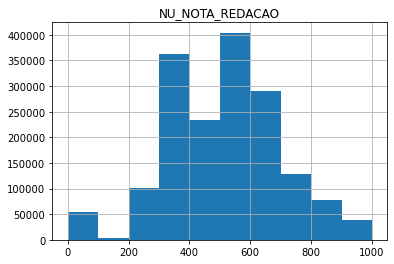

In [32]:
enem_redacao.groupby('TP_SEXO').hist()

In [33]:
enem_redacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2454691.0  512.529145  187.440251  0.0  360.0  520.0  620.0   
M             1693573.0  503.102340  187.437803  0.0  360.0  520.0  620.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

In [34]:
colunasSelecionada2 = ['NU_INSCRICAO', 'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'Q001', 'Q002']
enem_social = dadoenem_df.filter(items=colunasSelecionada2)

In [41]:
enem_social.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,NU_NOTA_MT,Q001,Q002
0,180008202043,NaN,NaN,A,A
1,180007197856,280.0,480.3,B,B
2,180008517434,NaN,NaN,E,E
3,180007661228,NaN,NaN,B,C
4,180008787987,360.0,NaN,C,E


In [42]:
enem_social=enem_social.dropna()

In [43]:
qdict = {'A':'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [44]:
enem_social_df = enem_social.filter(items=['NU_INSCRICAO', 'Q001']).groupby('Q001').count()

In [47]:
enem_social_df

,NU_INSCRICAO
Q001,
A,200902
B,813670
C,549969
D,460454
E,1043472
F,311918
G,187705
H,325653


In [51]:
enem_social['DESC_Q001'] = [qdict[resp] for resp in enem_social.Q001]

In [53]:
enem_social['DESC_Q002'] = [qdict[resp] for resp in enem_social.Q002]

In [54]:
enem_social.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,NU_NOTA_MT,Q001,Q002,DESC_Q001,DESC_Q002
1,180007197856,280.0,480.3,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,580.0,538.8,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,680.0,733.8,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,340.0,459.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,740.0,525.4,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


In [64]:
enem_social_pai = enem_social.filter(items=['NU_INSCRICAO', 'DESC_Q001']).groupby('DESC_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

In [65]:
enem_social_pai

,NU_INSCRICAO
DESC_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1043472
Não completou a 4ª série/5º ano do Ensino Fundamental,813670
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549969
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460454
Não sei,325653
"Completou a Faculdade, mas não completou a Pós-graduação",311918
Nunca estudou,200902
Completou a Pós-graduação,187705


In [66]:
enem_social_mae = enem_social.filter(items=['NU_INSCRICAO', 'DESC_Q002']).groupby('DESC_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

In [67]:
enem_social_mae

,NU_INSCRICAO
DESC_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1275076
Não completou a 4ª série/5º ano do Ensino Fundamental,606702
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515982
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",509545
"Completou a Faculdade, mas não completou a Pós-graduação",417225
Completou a Pós-graduação,322696
Nunca estudou,136414
Não sei,110103


In [72]:
matematica_mae = enem_social.filter(items=['NU_NOTA_MT', 'DESC_Q002']).groupby('DESC_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [73]:
matematica_mae

,NU_NOTA_MT
DESC_Q002,
Completou a Pós-graduação,604.646114
"Completou a Faculdade, mas não completou a Pós-graduação",591.438424
"Completou o Ensino Médio, mas não completou a Faculdade",541.991564
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",521.292757
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",512.046346
Não sei,504.112213
Não completou a 4ª série/5º ano do Ensino Fundamental,497.003174
Nunca estudou,478.218055


In [74]:
matematica_pai = enem_social.filter(items=['NU_NOTA_MT', 'DESC_Q001']).groupby('DESC_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [75]:
matematica_pai 

,NU_NOTA_MT
DESC_Q001,
Completou a Pós-graduação,628.857128
"Completou a Faculdade, mas não completou a Pós-graduação",606.911985
"Completou o Ensino Médio, mas não completou a Faculdade",550.922641
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",530.540300
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",519.450349
Não sei,512.678252
Não completou a 4ª série/5º ano do Ensino Fundamental,502.412921
Nunca estudou,483.412209


In [76]:
redacao_pai = enem_social.filter(items=['NU_NOTA_REDACAO', 'DESC_Q001']).groupby('DESC_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [77]:
redacao_pai

,NU_NOTA_REDACAO
DESC_Q001,
Completou a Pós-graduação,652.213740
"Completou a Faculdade, mas não completou a Pós-graduação",622.431152
"Completou o Ensino Médio, mas não completou a Faculdade",544.272256
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",511.711832
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.834723
Não sei,474.284161
Não completou a 4ª série/5º ano do Ensino Fundamental,464.490076
Nunca estudou,427.263044


In [80]:
redacao_mae = enem_social.filter(items=['NU_NOTA_REDACAO', 'DESC_Q002']).groupby('DESC_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [81]:
redacao_mae

,NU_NOTA_REDACAO
DESC_Q002,
Completou a Pós-graduação,622.780760
"Completou a Faculdade, mas não completou a Pós-graduação",601.241249
"Completou o Ensino Médio, mas não completou a Faculdade",530.016015
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",495.963850
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.675260
Não completou a 4ª série/5º ano do Ensino Fundamental,454.591612
Não sei,447.204163
Nunca estudou,414.232410


<AxesSubplot:xlabel='DESC_Q002'>

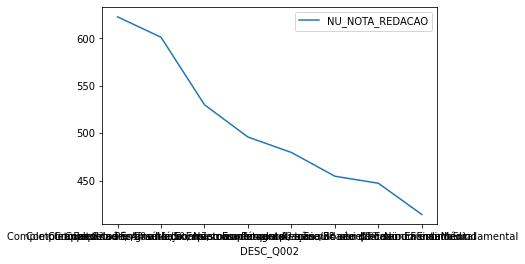

In [82]:
redacao_mae.plot()

In [83]:
redacao_mae.describe()

,NU_NOTA_REDACAO
count,8.000000
mean,505.713165
std,74.257786
min,414.232410
25%,452.744750
50%,487.819555
75%,547.822323
max,622.780760
